# Neural Netwoks

# Data fetch

In [1]:
import pandas as pd

In [9]:
class_name = 'Cultivars'

feature_cols = [
        'Alcohol',
        'Malic_acid',
        'Ash',
        'Alcalinity_of_ash',
        'Magnesium',
        'Total_phenols',
        'Flavanoids',
        'Nonflavanoid_phenols',
        'Proanthocyanins',
        'Color_intensity',
        'Hue',
        'OD280/OD315_of_diluted_wines',
        'Proline'
    ]

cols = feature_cols.copy()
cols.insert(0, class_name)

df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', 
                 header=None, names=cols)

features = df.drop(class_name, axis=1)
target = df[class_name]

df.head()

,Cultivars,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [10]:
import keras
from keras.layers import Dense
from keras.models import Sequential

batch_size = 60
num_classes = 3
epochs = 150
input_dim = len(feature_cols) 

Using TensorFlow backend.
/home/stepan/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/stepan/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/stepan/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/stepan/.local/lib/python3.6/site-packages/tensorflow/python

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

x_train, x_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.3)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical([x-1 for x in y_train.iloc[:].values], num_classes)
y_test = keras.utils.to_categorical([x-1 for x in y_test.iloc[:].values], num_classes)

NameError: name 'features' is not defined

# MLP

In [5]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(input_dim,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 27        
Total params: 211
Trainable params: 211
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=150,
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 124 samples, validate on 54 samples
Epoch 1/150
124/124 [==============================] - 0s 1ms/step - loss: 1.1218 - accuracy: 0.3306 - val_loss: 1.1221 - val_accuracy: 0.3519
Epoch 2/150
124/124 [==============================] - 0s 54us/step - loss: 1.1041 - accuracy: 0.3629 - val_loss: 1.1076 - val_accuracy: 0.3519
Epoch 3/150
124/124 [==============================] - 0s 70us/step - loss: 1.0882 - accuracy: 0.4032 - val_loss: 1.0936 - val_accuracy: 0.3519
Epoch 4/150
124/124 [==============================] - 0s 96us/step - loss: 1.0733 - accuracy: 0.4355 - val_loss: 1.0799 - val_accuracy: 0.3519
Epoch 5/150
124/124 [==============================] - 0s 92us/step - loss: 1.0581 - accuracy: 0.4677 - val_loss: 1.0675 - val_accuracy: 0.3704
Epoch 6/150
124/124 [==============================] - 0s 97us/step - loss: 1.0437 - accuracy: 0.4919 - val_loss: 1.0563 - val_accuracy: 0.3704
Epoch 7/150
124/124 [==============================] - 0s 74us/step - loss: 1.0307 - accura

Epoch 56/150
124/124 [==============================] - 0s 67us/step - loss: 0.5771 - accuracy: 0.8306 - val_loss: 0.6219 - val_accuracy: 0.8519
Epoch 57/150
124/124 [==============================] - 0s 91us/step - loss: 0.5691 - accuracy: 0.8306 - val_loss: 0.6131 - val_accuracy: 0.8519
Epoch 58/150
124/124 [==============================] - 0s 96us/step - loss: 0.5608 - accuracy: 0.8387 - val_loss: 0.6042 - val_accuracy: 0.8519
Epoch 59/150
124/124 [==============================] - 0s 73us/step - loss: 0.5528 - accuracy: 0.8387 - val_loss: 0.5957 - val_accuracy: 0.8519
Epoch 60/150
124/124 [==============================] - 0s 58us/step - loss: 0.5446 - accuracy: 0.8468 - val_loss: 0.5872 - val_accuracy: 0.8704
Epoch 61/150
124/124 [==============================] - 0s 106us/step - loss: 0.5362 - accuracy: 0.8468 - val_loss: 0.5787 - val_accuracy: 0.8704
Epoch 62/150
124/124 [==============================] - 0s 88us/step - loss: 0.5285 - accuracy: 0.8468 - val_loss: 0.5700 - val_a

# CNN

In [44]:
import os, shutil
from keras.preprocessing import image

def get_files_in_dir(path):
    return [os.path.join(path, fname) for fname in os.listdir(path)]

train_dir = 'fruits-360_dataset/banana_and_apple/train/'

test_dir = 'fruits-360_dataset/banana_and_apple/test/'

train_apple_dir = train_dir + 'Apple Golden 2'
train_banana_dir = train_dir + 'Banana'

fnames_apple = get_files_in_dir(train_apple_dir)
fnames_banana = get_files_in_dir(train_banana_dir)

apple = image.load_img(fnames_apple[3], target_size=(100, 100))
banana = image.load_img(fnames_banana[3], target_size=(100, 100))

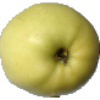

In [45]:
apple

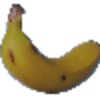

In [46]:
banana

In [14]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

val_datagen = ImageDataGenerator(rescale=1./255)

In [26]:
img_size = (100, 100)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='binary')


validation_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='binary')

Found 982 images belonging to 2 classes.
Found 330 images belonging to 2 classes.


In [37]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dropout, Flatten, Dense
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(2, 2), padding="same", activation="relu", input_shape=(100,100,3)))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(filters=64, kernel_size=(4, 4), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dense(2, activation="softmax"))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 100, 100, 16)      208       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 25, 25, 64)        32832     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 10816)           

In [40]:
model.fit_generator(
    train_generator,
    steps_per_epoch=30,
    epochs=8,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=30)

Epoch 1/8
30/30 [==============================] - 9s 286ms/step - loss: 3.0997e-06 - accuracy: 1.0000 - val_loss: 4.6342e-06 - val_accuracy: 1.0000
Epoch 2/8
30/30 [==============================] - 8s 273ms/step - loss: 6.4468e-06 - accuracy: 1.0000 - val_loss: 2.0117e-07 - val_accuracy: 1.0000
Epoch 3/8
30/30 [==============================] - 8s 271ms/step - loss: 2.5088e-06 - accuracy: 1.0000 - val_loss: 1.1213e-06 - val_accuracy: 1.0000
Epoch 4/8
30/30 [==============================] - 8s 276ms/step - loss: 3.9255e-06 - accuracy: 1.0000 - val_loss: 1.1176e-07 - val_accuracy: 1.0000
Epoch 5/8
30/30 [==============================] - 8s 277ms/step - loss: 1.3145e-06 - accuracy: 1.0000 - val_loss: 1.1399e-06 - val_accuracy: 1.0000
Epoch 6/8
30/30 [==============================] - 10s 347ms/step - loss: 5.4999e-06 - accuracy: 1.0000 - val_loss: 1.7919e-06 - val_accuracy: 1.0000
Epoch 7/8
30/30 [==============================] - 10s 349ms/step - loss: 1.7057e-05 - accuracy: 1.0000 -

## RNN

In [1]:
import pandas as pd

data = pd.read_csv('hourly-energy-consumption/AEP_hourly.csv', encoding='windows-1252')

data

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0
...,...,...
121268,2018-01-01 20:00:00,21089.0
121269,2018-01-01 21:00:00,20999.0
121270,2018-01-01 22:00:00,20820.0
121271,2018-01-01 23:00:00,20415.0


In [36]:
df = pd.read_csv('hourly-energy-consumption/AEP_hourly.csv', index_col='Datetime', parse_dates=['Datetime'])
df.head()

,AEP_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0


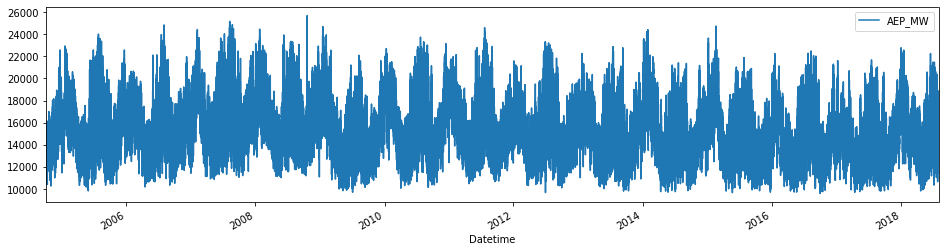

In [37]:
df.plot(figsize=(16,4),legend=True)

In [40]:
from sklearn.preprocessing import MinMaxScaler

def normalize_data(df):
    scaler = MinMaxScaler()
    df['AEP_MW']=scaler.fit_transform(df['AEP_MW'].values.reshape(-1,1))
    return df

df_norm = normalize_data(df)
df_norm.shape

(121273, 2)

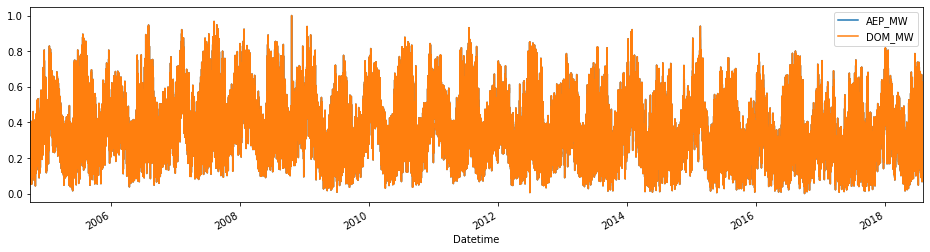

In [41]:
df.plot(figsize=(16,4),legend=True)

In [42]:
import numpy as np

def load_data(stock, seq_len):
    X_train = []
    y_train = []
    for i in range(seq_len, len(stock)):
        X_train.append(stock.iloc[i-seq_len : i, 0])
        y_train.append(stock.iloc[i, 0])
    
    X_test = X_train[110000:]             
    y_test = y_train[110000:]
    
    X_train = X_train[:110000]           
    y_train = y_train[:110000]
    
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    
    X_train = np.reshape(X_train, (110000, seq_len, 1))
    
    X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))
    
    return [X_train, y_train, X_test, y_test]

In [43]:
seq_len = 20
X_train, y_train, X_test, y_test = load_data(df, seq_len)

print('X_train.shape = ',X_train.shape)
print('y_train.shape = ', y_train.shape)
print('X_test.shape = ', X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (110000, 20, 1)
y_train.shape =  (110000,)
X_test.shape =  (11253, 20, 1)
y_test.shape =  (11253,)


In [44]:
from keras.layers import Dense,Dropout,SimpleRNN

rnn_model = Sequential()

rnn_model.add(SimpleRNN(40,activation="tanh",return_sequences=True, input_shape=(X_train.shape[1],1)))
rnn_model.add(Dropout(0.15))

rnn_model.add(SimpleRNN(40,activation="tanh",return_sequences=True))
rnn_model.add(Dropout(0.15))

rnn_model.add(SimpleRNN(40,activation="tanh",return_sequences=False))
rnn_model.add(Dropout(0.15))

rnn_model.add(Dense(1))

rnn_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_10 (SimpleRNN)    (None, 20, 40)            1680      
_________________________________________________________________
dropout_10 (Dropout)         (None, 20, 40)            0         
_________________________________________________________________
simple_rnn_11 (SimpleRNN)    (None, 20, 40)            3240      
_________________________________________________________________
dropout_11 (Dropout)         (None, 20, 40)            0         
_________________________________________________________________
simple_rnn_12 (SimpleRNN)    (None, 40)                3240      
_________________________________________________________________
dropout_12 (Dropout)         (None, 40)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

In [45]:
rnn_model.compile(optimizer="adam",loss="MSE")
rnn_model.fit(X_train, y_train, epochs=10, batch_size=1000)

Epoch 1/10
110000/110000 [==============================] - 7s 66us/step - loss: 0.1077
Epoch 2/10
110000/110000 [==============================] - 7s 60us/step - loss: 0.0213
Epoch 3/10
110000/110000 [==============================] - 7s 61us/step - loss: 0.0118
Epoch 4/10
110000/110000 [==============================] - 7s 60us/step - loss: 0.0082
Epoch 5/10
110000/110000 [==============================] - 7s 60us/step - loss: 0.0063
Epoch 6/10
110000/110000 [==============================] - 7s 60us/step - loss: 0.0052
Epoch 7/10
110000/110000 [==============================] - 7s 64us/step - loss: 0.0044
Epoch 8/10
110000/110000 [==============================] - 7s 64us/step - loss: 0.0038
Epoch 9/10
110000/110000 [==============================] - 7s 65us/step - loss: 0.0034
Epoch 10/10
110000/110000 [==============================] - 7s 65us/step - loss: 0.0031


In [46]:

from sklearn.metrics import r2_score


rnn_predictions = rnn_model.predict(X_test)

rnn_score = r2_score(y_test,rnn_predictions)
print("R2 Score of RNN model = ",rnn_score)

R2 Score of RNN model =  0.9659450721913114


Populating the interactive namespace from numpy and matplotlib


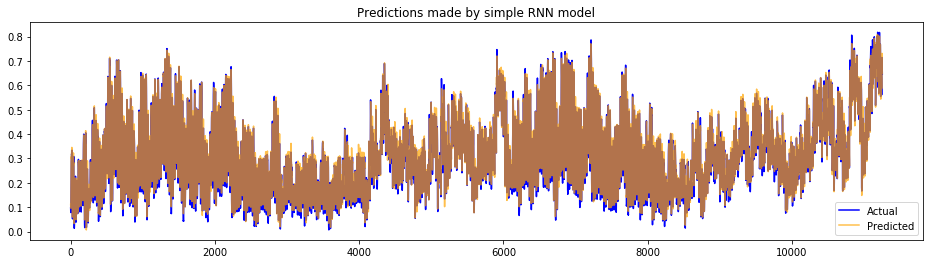

In [47]:

%pylab inline

def plot_predictions(test, predicted, title):
    plt.figure(figsize=(16,4))
    plt.plot(test, color='blue',label='Actual')
    plt.plot(predicted, alpha=0.7, color='orange',label='Predicted')
    plt.title(title)
    plt.legend()
    plt.show()
    
plot_predictions(y_test, rnn_predictions, "Predictions made by simple RNN model")

In [29]:
from keras.layers import Dense, Dropout, LSTM, Embedding

model = Sequential()
model.add(Embedding(4, 128))
model.add(LSTM(128, activation='relu', return_sequences=True))
model.add(Dropout(0.2))

#model.add(LSTM(128, activation='relu'))
#model.add(Dropout(0.1))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='softmax'))



In [30]:
from keras.optimizers import Adam

opt = Adam(lr=0.001, decay=1e-6)

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy'],
)

model.fit(x_train,y_train,
          epochs=3,
          verbose=1,
          validation_data=(x_test, y_test))

ValueError: Error when checking target: expected dense_8 to have 3 dimensions, but got array with shape (107377, 1)

In [2]:
test_data = data[(data['Datetime'] > '2017-01-01') & (data['Datetime'] < '2018-01-01')]
train_data = data[(data['Datetime'] < '2017-01-01')]

In [3]:
def make_features(df):
    df['Datetime'] = pd.to_datetime(df['Datetime'])
    df['year'] = df['Datetime'].dt.year
    df['month'] = df['Datetime'].dt.month
    df['day'] = df['Datetime'].dt.day
    df['hour'] = df['Datetime'].dt.hour
    return df.drop(columns=['Datetime'])

x_test = make_features(test_data)
x_train = make_features(train_data)

y_train = x_train['AEP_MW']
y_test = x_test['AEP_MW']

x_train = x_train.drop(columns=['AEP_MW'])
x_test = x_test.drop(columns=['AEP_MW'])

print(x_train.shape)